### ***GOOGLE DRIVE AND SYSTEM PATH***

In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
import sys
path_to_module = 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
import os
#os.environ["OMP_NUM_THREADS"] = '6'

### ***NEEDED LIBRARIES***

In [2]:
# SET DEVICE
import torch
############
# LOAD DATASET
from New_Code_Files.Datasets_Functions import createHashMap, getHashMap, appendInHashMap, deleteFromHashMap, updateHashMap, functionGetDataset, makeHashMapWithListsToHashmapWithDicts
############
# VISUALIZATION
import matplotlib.colors as mcolors
import numpy as np
from New_Code_Files.Visualization import Visualization
############
# CREATE AUTOENCODER
from New_Code_Files.Autoencoder import Autoencoder, createAutoencoder
############

### ***SET DEVICE***

In [3]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### ***LOAD DATASET***

In [4]:
hashMapFilePath = path_to_module+"/New_Code_Files/"
updateHashMap("R3",{'batch_size': 100, 'n_clusters': 3, 'module_name': 'datasets.datasets_New', 'function_name': 'load_R3_dataloader', 'option_name': ''},hashMapFilePath)

hashMap = getHashMap(hashMapFilePath)
print(hashMap.keys())
#datasetName = "STL10"
#datasetName = "eMNIST_balanced_letters"
datasetName = "R3"
datasetProperties = hashMap[datasetName]
print(datasetProperties)
batchSize = datasetProperties['batch_size'] #= 30
nClusters = datasetProperties['n_clusters'] #= 3
dataloader, inputDim, data_np, labels = functionGetDataset(datasetProperties)
print("Data_Shape is:",inputDim)
print("Batches Number is:",len(dataloader))

{'10x73k': {'batch_size': 256, 'n_clusters': 8, 'module_name': 'datasets.datasets_New', 'function_name': 'load_10x73k', 'option_name': ''}, 'TCGA': {'batch_size': 256, 'n_clusters': 5, 'module_name': 'datasets.datasets_New', 'function_name': 'load_TCGA', 'option_name': ''}, 'coil20': {'batch_size': 256, 'n_clusters': 20, 'module_name': 'datasets.datasets_New', 'function_name': 'load_coil20_dataloader', 'option_name': ''}, 'eMNIST_balanced_letters': {'batch_size': 256, 'n_clusters': 37, 'module_name': 'datasets.datasets_New', 'function_name': 'load_eMNIST_dataloader', 'option_name': 'balanced letters'}, 'eMNIST_mnist': {'batch_size': 256, 'n_clusters': 10, 'module_name': 'datasets.datasets_New', 'function_name': 'load_eMNIST_dataloader', 'option_name': 'mnist'}, 'eMNIST_balanced_digits': {'batch_size': 256, 'n_clusters': 10, 'module_name': 'datasets.datasets_New', 'function_name': 'load_eMNIST_dataloader', 'option_name': 'balanced digits'}, 'Dermatology': {'batch_size': 64, 'n_clusters'

### ***PARAMETERS***

In [5]:
# Latent Dimension
latentDim = 2

negativeSlope = 0

# Batch Size and Number of Clusters


# Pre-Training Epochs and Learning Rate
preTrEpochs = 100
preTrLR = 1e-3

# Lamda, Training Epochs and Learning Rate
lamda = 0.01 # Possible values: 0.01, 0.1, 1
# For Balanced_Digits 0.01 seems good
# For Balanced_Letters 0.01 seems good
trLR = 1e-4
trEpochs = 100

kmeans_initialization = True
pretrain = True
isCD = False
num_of_channels = 1
kmeans_n_init = 100

### ***CREATE AUTOENCODER***

In [6]:
autoencoder = createAutoencoder(pathToModule = path_to_module, datasetName =  datasetName,
 inputDim = inputDim, negativeSlope = negativeSlope,
 nClusters = nClusters, device = device, preTrEpochs = preTrEpochs, dataloader = dataloader,
 batchSize = batchSize, preTrLR = preTrLR, lamda = lamda,
 trEpochs = trEpochs, trLR = trLR,
 latentDim = latentDim, isCD = isCD, kmeans_n_init = 100,  num_of_channels = num_of_channels)

 ### ***PRETRAIN AUTOENCODER***

In [7]:
if(pretrain):
    autoencoder.pretrain_autoencoder()
    autoencoder.save_pretrained_weights()
else:
    model_save_path = autoencoder.dataDirPath + "\\Weigths\\autoencoder_weights.pth"
    autoencoder.load_state_dict(torch.load(model_save_path))
    normPreTrEpochs = autoencoder.preTrEpochs  
    autoencoder.preTrEpochs = 1
    autoencoder.pretrain_autoencoder()
    autoencoder.preTrRpochs = normPreTrEpochs
autoencoder.preTrainedLatentdata.shape

Epoch: 1/100, Loss: 4.324509
Epoch: 2/100, Loss: 0.995001
Epoch: 3/100, Loss: 0.732748
Epoch: 4/100, Loss: 0.584805
Epoch: 5/100, Loss: 0.613729
Epoch: 6/100, Loss: 0.524188
Epoch: 7/100, Loss: 0.547935
Epoch: 8/100, Loss: 0.411322
Epoch: 9/100, Loss: 0.425982
Epoch: 10/100, Loss: 0.411958
Epoch: 11/100, Loss: 0.419685
Epoch: 12/100, Loss: 0.378384
Epoch: 13/100, Loss: 0.362949
Epoch: 14/100, Loss: 0.404695
Epoch: 15/100, Loss: 0.453502
Epoch: 16/100, Loss: 0.391314
Epoch: 17/100, Loss: 0.341787
Epoch: 18/100, Loss: 0.337768
Epoch: 19/100, Loss: 0.358357
Epoch: 20/100, Loss: 0.340104
Epoch: 21/100, Loss: 0.300696
Epoch: 22/100, Loss: 0.299635
Epoch: 23/100, Loss: 0.311666
Epoch: 24/100, Loss: 0.317109
Epoch: 25/100, Loss: 0.321668
Epoch: 26/100, Loss: 0.318160
Epoch: 27/100, Loss: 0.289005
Epoch: 28/100, Loss: 0.309569
Epoch: 29/100, Loss: 0.305889
Epoch: 30/100, Loss: 0.300751
Epoch: 31/100, Loss: 0.295172
Epoch: 32/100, Loss: 0.262597
Epoch: 33/100, Loss: 0.252807
Epoch: 34/100, Loss

(1500, 2)

### ***VISUALIZATION***

In [8]:
color_list = list(mcolors.CSS4_COLORS.keys()) + list(mcolors.XKCD_COLORS.keys())
np.random.shuffle(color_list)
color_list = ['deepskyblue', 'gold', 'hotpink', 'limegreen'] + color_list
visualization = Visualization(color_list,15,autoencoder)

 ### ***TRAINING WITH SOFT SILHOUETTE***

In [9]:
if(kmeans_initialization):
    autoencoder.kmeans_initialization(100)
    

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Epoch: 0 REC_LOSS: 0.1115 CL_LOSS: 0.1134 SIL: 3.6640 ACC: 0.92 PUR: 0.92 NMI: 0.79 ARI: 0.80
Epoch: 1 REC_LOSS: 0.0558 CL_LOSS: 0.0989 SIL: 5.1076 ACC: 0.98 PUR: 0.98 NMI: 0.91 ARI: 0.94
Epoch: 2 REC_LOSS: 0.0392 CL_LOSS: 0.0934 SIL: 5.6572 ACC: 0.99 PUR: 0.99 NMI: 0.94 ARI: 0.96
Epoch: 3 REC_LOSS: 0.0353 CL_LOSS: 0.0897 SIL: 6.0261 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 4 REC_LOSS: 0.0308 CL_LOSS: 0.0883 SIL: 6.1650 ACC: 0.99 PUR: 0.99 NMI: 0.94 ARI: 0.96
Epoch: 5 REC_LOSS: 0.0293 CL_LOSS: 0.0868 SIL: 6.3218 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 6 REC_LOSS: 0.0297 CL_LOSS: 0.0859 SIL: 6.4086 ACC: 0.99 PUR: 0.99 NMI: 0.94 ARI: 0.97
Epoch: 7 REC_LOSS: 0.0293 CL_LOSS: 0.0844 SIL: 6.5601 ACC: 0.99 PUR: 0.99 NMI: 0.94 ARI: 0.97
Epoch: 8 REC_LOSS: 0.0278 CL_LOSS: 0.0835 SIL: 6.6502 ACC: 0.99 PUR: 0.99 NMI: 0.94 ARI: 0.97
Epoch: 9 REC_LOSS: 0.0252 CL_LOSS: 0.0827 SIL: 6.7309 ACC: 0.99 PUR: 0.99 NMI: 0.94 ARI: 0.97
Epoch: 10 REC_LOSS: 0.0245 CL_LOSS: 0.0819 SIL: 6.8112 ACC: 

Epoch: 88 REC_LOSS: 0.0051 CL_LOSS: 0.0580 SIL: 9.2021 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 89 REC_LOSS: 0.0065 CL_LOSS: 0.0573 SIL: 9.2684 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 90 REC_LOSS: 0.0055 CL_LOSS: 0.0573 SIL: 9.2693 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 91 REC_LOSS: 0.0055 CL_LOSS: 0.0569 SIL: 9.3132 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 92 REC_LOSS: 0.0056 CL_LOSS: 0.0567 SIL: 9.3308 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 93 REC_LOSS: 0.0049 CL_LOSS: 0.0566 SIL: 9.3445 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 94 REC_LOSS: 0.0047 CL_LOSS: 0.0562 SIL: 9.3784 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 95 REC_LOSS: 0.0058 CL_LOSS: 0.0560 SIL: 9.4039 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 96 REC_LOSS: 0.0045 CL_LOSS: 0.0559 SIL: 9.4118 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 97 REC_LOSS: 0.0042 CL_LOSS: 0.0554 SIL: 9.4565 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Epoch: 98 REC_LOSS: 0.0046 CL_LOSS: 0.0554 SIL: 9.

C:\Users\PAPASOFT INC\Desktop\SOFT_SIL\New_Code_Files\Visualization.py:143: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  dataWriter.book = excelDataWΒ
C:\Users\PAPASOFT INC\Desktop\SOFT_SIL\New_Code_Files\Visualization.py:146: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  dataWriter.save()


[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.606220
[t-SNE] KL divergence after 300 iterations: 0.939387
Directory 'C:\Users\PAPASOFT INC\Desktop\SOFT_SIL/R3/AE_3_HL_LS/R3_With_100_Eps_h1_500-LR_h2_500-LR_h3_2000-LR_ls_2-TH_out_2-LR_outm_3-L_pe_100_pl_0.001_bs_100_l_0.0001_lamda_0.01\Experiment_Plots\TSNE' created successfully.


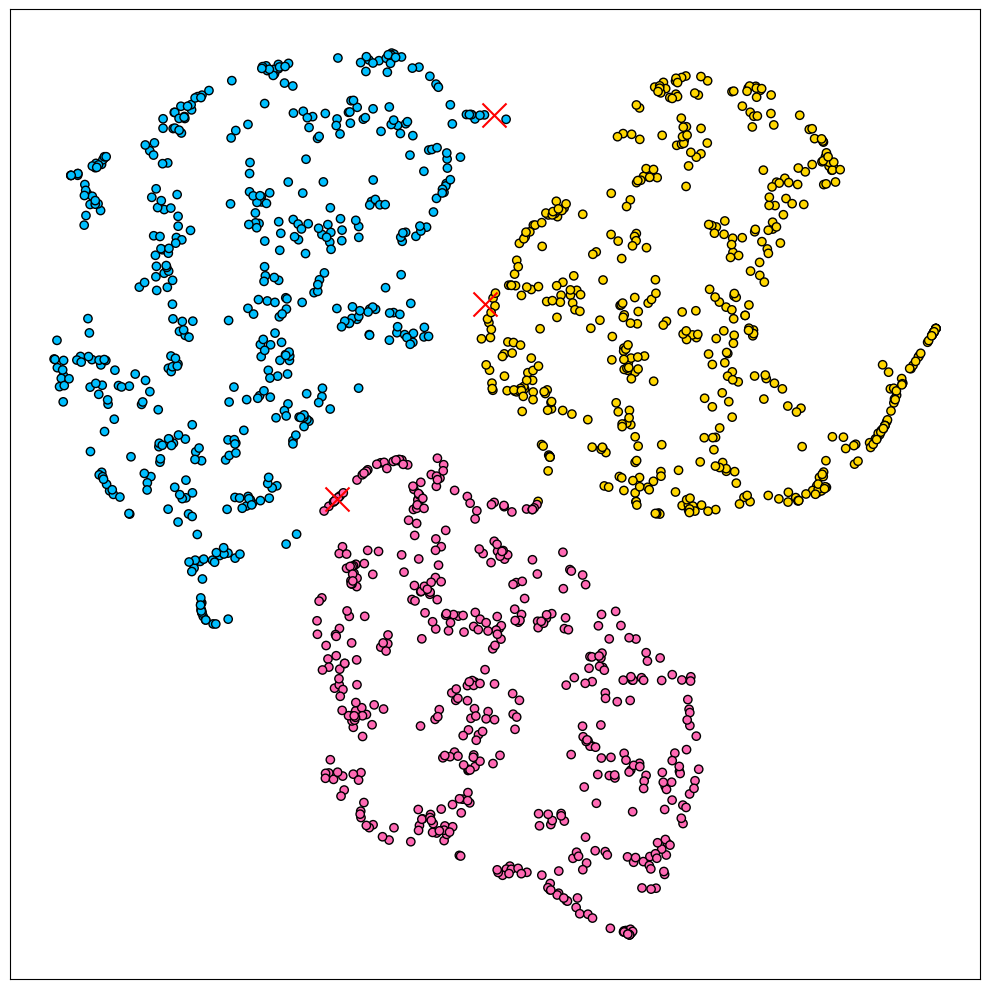

In [10]:
"""
while True:
    # Code block to execute repeatedly
    autoencoder.trEpochs = 10
    autoencoder.train_autoencoder(silhouette_method = "default")
    visualization.makeExcel()
    #visualization.makePlot(useTSNE=False)
    #visualization.makePlot(useTSNE=True)
    visualization.plot_3D()

    # Check the condition to exit the loop
    if autoencoder.experimentName == "Experiment_400":
        break
"""
autoencoder.train_autoencoder(silhouette_method = "default")

visualization.makeExcel()
#visualization.makePlot(useTSNE=False)
visualization.plot_tsne()